(gof-notebook)=
# Indici di bontà dell'adattamento 

I passi principali nella modellazione SEM comprendono la specificazione del modello, la stima dei parametri, la valutazione del modello e dei parametri e la modificazione del modello. Questa sequenza può essere ripetuta molte volte fino a quando non si trovi un modello considerato accettabile. La valutazione del modello viene eseguita calcolando vari indici di bontà dell'adattamento. In questo capitolo considereremo i principali indici di bontà dell'adattamento utilizzati nella letteratura.

In [1]:
source("_common.R")
suppressPackageStartupMessages({
    library("lavaan")
    library("lavaanExtra")
    library("lavaanPlot")
    library("psych")
    library("dplyr") 
    library("tidyr")
    library("knitr")
    library("mvnormalTest")
    library("semPlot")
    library("DiagrammeRsvg")
    library("rsvg")
    library("effectsize")
})

set.seed(42)

Warning message in file(filename, "r", encoding = encoding):
“non è possibile aprire il file '_common.R': No such file or directory”


ERROR: Error in file(filename, "r", encoding = encoding): non è possibile aprire la connessione


## Valutazione della Bontà di Adattamento nel Modello SEM

Nel contesto dei modelli SEM (Structural Equation Modeling), la valutazione dell'adattamento del modello si basa sul confronto tra la matrice di varianze e covarianze stimata dal modello, $\Sigma(\hat{\theta})$, e la matrice di covarianza campionaria, $S$. Il nostro obiettivo è verificare se la discrepanza tra queste due matrici indica possibili inadeguatezze nel modello proposto. Ecco alcuni aspetti rilevanti da considerare:

- **Modelli Saturi vs Modelli Ristretti**: Un modello saturo include un numero di parametri in $\theta$ pari al numero di elementi distinti nella matrice di covarianza. In contrasto, un modello ristretto ha meno parametri rispetto al numero degli elementi distinti nella matrice di covarianza. La differenza tra questi due numeri corrisponde ai gradi di libertà del modello. Per esempio, in un modello saturo, se il numero dei parametri in $\theta$ e il numero degli elementi distinti nella matrice di covarianza sono entrambi 3, allora il modello ha zero gradi di libertà.

- **Perfetto Adattamento dei Modelli Saturi**: In un modello saturo, $\Sigma(\hat{\theta})$ coincide sempre con $S$, poiché il modello ha abbastanza parametri per adattarsi perfettamente ai dati del campione. Tuttavia, ciò non implica necessariamente che il modello rappresenti fedelmente la popolazione più ampia. Le stime dei parametri in un modello saturo possono fornire informazioni sui pattern di relazione tra le variabili nel campione specifico, ma è cruciale interpretarle con cautela.

- **Stima e Identificabilità del Modello**: Generalmente, la stima dei parametri non si basa sul semplice risolvere un sistema di equazioni matematiche. Invece, si utilizza una funzione di adattamento o discrepanza tra $\Sigma(\theta)$ e $S$, cercando il valore ottimale di $\hat{\theta}$ attraverso tecniche di ottimizzazione numerica. Un modello SEM deve essere identificabile, il che significa che deve essere possibile stimare univocamente i parametri del modello. L'identificabilità implica che il numero di unità di informazione, come elementi nella matrice di covarianza, sia maggiore o uguale al numero di parametri da stimare.

### Gradi di Libertà e Identificabilità del Modello

I gradi di libertà (dof) in un modello SEM sono calcolati come:

$$
dof = \# (\text{unità di informazione}) - \# (\text{parametri da stimare})
$$

Per una matrice di covarianza di ordine $ p $, il numero di unità di informazione è $ \frac{p (p+1)}{2} $. Per garantire l'identificabilità, è necessario soddisfare alcune condizioni:

1. In tutti i modelli, l'unità di misura delle variabili latenti deve essere specificata.
2. Il numero di unità di informazione deve essere uguale o superiore al numero di parametri da stimare.
3. In modelli ad un fattore, è richiesto un minimo di tre indicatori per una soluzione "appena identificata".
4. In modelli a più fattori, si raccomanda un minimo di tre indicatori per ogni variabile latente.

Un modello è:
- *Non identificato* se $ dof < 0 $.
- *Appena identificato* o "saturo" se $ dof = 0 $.
- *Sovra-identificato* se $ dof > 0 $.

È importante notare che un'analisi fattoriale con solo due indicatori per un fattore non è possibile, poiché ci sono meno unità di informazione rispetto ai parametri da stimare. Un modello con tre indicatori e un fattore è "appena identificato", senza gradi di libertà per valutare la bontà dell'adattamento. Per modelli ad un solo fattore comune latente, è quindi necessario disporre di almeno quattro indicatori.

### Funzione di Discrepanza e Valutazione della Bontà di Adattamento

La funzione di discrepanza tra $|S|$ e $|\Sigma(\theta)|$ basata sulla massima verosimiglianza (ML) deriva dalla verosimiglianza normale multivariata dei dati ed è formulata nel seguente modo:

$$
FML(S, \Sigma(\theta)) = \log|\Sigma(\theta)| - \log|S| + \text{traccia}(S\Sigma(\theta)^{-1}) - p
$$

dove $|S|$ e $|\Sigma(\theta)|$ sono i determinanti di $S$ e $\Sigma(\theta)$ rispettivamente, e $p$ è la dimensione di $S$ o $\Sigma(\theta)$. In questo contesto, $\log|\Sigma(\theta)|$ rappresenta il logaritmo del determinante della matrice di covarianza stimata dal modello, mentre $\log|S|$ è il logaritmo del determinante della matrice di covarianza campionaria. La "traccia" ($S\Sigma(\theta)^{-1}$) è la somma degli elementi della diagonale principale del prodotto di $S$ per l'inverso di $\Sigma(\theta)$. Questa funzione di discrepanza misura la differenza tra le covarianze osservate e quelle stimate dal modello, prendendo in considerazione sia le dimensioni delle matrici sia la loro forma.

La funzione di discrepanza basata sulla massima verosimiglianza (ML), come quella descritta dalla formula precedente, si distribuisce asintoticamente come una variabile casuale seguente una distribuzione chi quadrato (χ²) sotto l'ipotesi nulla che il modello specificato si adatti perfettamente ai dati.

La distribuzione chi quadrato è utilizzata per testare l'adattamento del modello nei contesti di modellazione di equazioni strutturali (SEM) e di analisi fattoriale. Il valore calcolato dalla funzione di discrepanza viene confrontato con un valore critico dalla distribuzione chi quadrato. Il numero di gradi di libertà per la distribuzione chi quadrato è tipicamente calcolato come la differenza tra il numero di stime indipendenti nella matrice di covarianza e il numero di parametri stimati nel modello.

Se il valore calcolato dalla funzione di discrepanza è inferiore al valore critico della distribuzione chi quadrato per i dati gradi di libertà, allora non si rifiuta l'ipotesi nulla e si conclude che il modello ha un buon adattamento. Se invece è maggiore, si rifiuta l'ipotesi nulla, indicando che il modello non si adatta bene ai dati.

In pratica, questo test è utilizzato per valutare la bontà di adattamento del modello ai dati osservati e per decidere se il modello specificato è adeguato o se sono necessarie ulteriori modifiche.

## Test $\chi^2$

Proseguendo la discussione precedente sulla valutazione dell'adattamento del modello, esaminiamo il test del chi quadrato (χ²) per la bontà di adattamento del modello. La statistica del chi quadrato è calcolata come il prodotto della dimensione del campione e della funzione di discrepanza minimizzata, ovvero χ² = N × Fmin. Alcuni software potrebbero usare (N-1) nel prodotto quando si adattano solo le strutture di covarianza.

Ricordiamo che l'ipotesi nulla testata è H0: Σ = Σ(θ). La statistica del chi quadrato viene utilizzata per determinare se il campione fornisce prove contro l'ipotesi nulla. Sotto l'ipotesi nulla di un vero modello nullo, la statistica del chi quadrato segue una distribuzione χ² con gradi di libertà specifici del modello. Quando il valore p-osservato della statistica del chi quadrato è molto piccolo (ad esempio, inferiore a un livello α convenzionale di 0,05), i dati presentano un evento estremo sotto H0. Un tale evento estremo (associato a un piccolo valore p) suggerisce che l'ipotesi nulla H0 potrebbe non essere sostenibile e dovrebbe essere rifiutata. Al contrario, più alto è il valore p associato al valore χ² osservato, più stretto è l'adattamento tra il modello ipotizzato (sotto H0) e l'adattamento perfetto (Bollen, 1989).

Tuttavia, la statistica del test del chi quadrato è sensibile alla dimensione del campione. Poiché la statistica χ² equivale a N × Fmin, questo valore tende ad essere sostanziale quando il modello non si adatta (anche minimamente) e la dimensione del campione è grande (Jöreskog e Sörbom, 1993). Il paradosso, tuttavia, è che l'analisi delle strutture di covarianza si basa sulla teoria dei grandi campioni. Di conseguenza, campioni grandi sono fondamentali per ottenere stime dei parametri precise, così come per la sostenibilità delle approssimazioni distribuzionali asintotiche (MacCallum et al., 1996).

Nonostante questi limiti, la statistica $\chi^2$ viene comunque utilizzata per altri scopi, come il confronto di modelli nidificati, il calcolo di altri indici di adattamento (ad es. l'indice di Tucker–Lewis) e il calcolo del rapporto tra $\chi^2$ e gradi di libertà. 

Sebbene la statistica $\chi^2$ sia riportata di routine nell'output dei software che svolgono la CFA, nella valutazione dell'adattamento del modello si fa solitamente affidamento su altri indici di adattamento. Tali indici possono essere suddivisi in tre categorie:

- *misure di adeguamento per il confronto* -- permettono di confrontare fra loro due o più modelli al fine di potere scegliere il modello (statisticamente) migliore;
- *misure di adeguamento parsimonioso* -- indici "aggiustati" in base ai gradi di libertà.
- *misure di adeguamento assoluto* -- indicano l'abilità del modello di riprodurre i dati osservati;

## Misure di adeguamento per il confronto

### CFI

Gli indici di *adattamento comparativo* [detti anche *indici di adattamento incrementale*; ad es. {cite:t}`hu1998fit`] valutano l'adattamento di una soluzione specificata dall'utente in relazione a un modello di base nidificato più ristretto. Tipicamente, il modello base è un modello "nullo" o "di indipendenza" in cui le covarianze tra tutti gli indicatori di input sono fissate a zero, ma nessun vincolo viene posto sulle varianze degli indicatori. 

Uno di questi indici, l'*indice di adattamento comparativo* (*comparative fit index*, CFI; Bentler, 1990), è calcolato come segue. Sia $\delta = \chi^2 - dof$, dove $dof$ sono i gradi di libertà di un particolare modello. Tanto più $\delta$ è prossimo allo zero tanto maggiore è la bontà dell'adattamento. La formula di CFI è

$$
\begin{equation}
CFI = \frac{\delta_B - \delta_T}{\delta_B},
\end{equation}
$$

dove il pedice $T$ denota il modello target (cioè il modello in valutazione) e il pedice $B$ denota il modello baseline (cioè il modello "nullo").

## Misure di adeguamento parsimonioso

### TLI 

Un indice che rientra nella degli indici di adeguamento parsimonioso è l'*indice Tucker-Lewis* (*Tucker–Lewis index*, TLI, anche chiamato indice di adattamento non normato). Il TLI si pone il problema di penalizzare la complessità del modello, ovvero include una funzione di penalizzazione per l'addizione di parametri che non migliorano in maniera sostanziale l'adattamento del modello. Il TLI è calcolato con la seguente formula:

$$
\begin{equation}
TLI = \frac{(\chi^2_B / dof_B)–(\chi^2_T / dof_T)}{(\chi^2_B / dof_B) – 1},
\end{equation}
$$

dove $\chi^2_T$ è il valore $\chi^2$ del modello target, $dof_T$ sono i gradi di libertà del modello target, $\chi^2_B$ è il valore $\chi^2$ del modello baseline e $dof_B$ sono i gradi di libertà del modello base.

## Misure di adeguamento assoluto

### RMSEA 

L'*errore quadratico medio di approssimazione* è una misura assoluta dell'adattamento perché non confronta la discrepanza del modello target rispetto a un modello di base, come CFI o TLI. Invece, RMSEA utilizza $\delta$ come parametro che misura il grado di errata specificazione del modello. Ricordiamo dalla discussione sull'indice CFI che $\delta = \chi^2 - df$, dove $df$ sono i gradi di libertà del modello. Tanto maggiore è $\delta$ tanto più grande è la mancanza di adattamento del modello ai dati. L'indice RMSEA si ottiene nel modo seguente:

$$
\begin{equation}
RMSEA = \sqrt{\frac{\delta}{dof \cdot (n-1)}},
\end{equation}
$$

dove $n$ corrisponde alla numerosità campionaria.

L'indice RMSEA fornisce una stima dell'errore di approssimazione che si
commette quando la matrice delle correlazioni (o covarianze) osservate viene riprodotta
tramite la matrice ricavata dalle saturazioni fattoriali. Questo indice rappresenta una stima della bontà di adattamento del modello nella popolazione,
ponderata per i gradi di liberà e quindi è una misura che tiene in
considerazione la parsimonia del modello. 

### RMRS

L'indice RMRS viene definito come la radice quadrata della media dei residui al quadrato. L'indice RMRS rappresenta la correlazione residua media, cioè non spiegata dal modello, ed è ricavabile con la seguente formula:

$$
\begin{equation}
RMRS = \sqrt{ \frac{2 \sum_i\sum_j(r_{ij} - \hat{r}_{ij})^2}{p(p+1)}},
\end{equation}
$$

dove $p$ è il numero di item, e $r_{ij}$ e $\hat{r}_{ij}$
sono rispettivamente la correlazione osservata e la correlazione
riprodotta tra le variabili $i$ e $j$.

### Interpretazione

Un valore RMSEA < .05 indica un "close fit" e quello < .08 suggerisce un ragionevole adattamento modello-dati. Bentler e Bonett (1980) raccomandano TLI > .90 per un adattamento accettabile.

L'interpretazione degli indici di bontà di adattamento trovati nella CFA o nella modellazione di equazioni strutturali può essere ottenuta usando le funzioni del pacchetto `effectsize`. 

## Esempio 1

Nel capitolo precedente abbiamo formulato un modello SEM nel quale abbiamo definito una variabile latente con le sei sottoscale della Self-Compassion Scale e una seconda variabile latente con le tre sottoscale della DASS-21. Abbiamo ipotizzato che il fattore dell'autocompassione eserciti un effetto (protettivo) nei confronti del disagio psicologico misurato dal fattore definito dalle sottoscale della DASS-21.

In [10]:
d_sc <- read.csv("data/dass_rosenberg_scs.csv", header = TRUE)

In [11]:
mod_sc <- "
  F =~ anxiety + depression + stress
  SC =~ self_kindness	+ common_humanity	+ mindfulness	+ self_judgment	+ isolation	+ over_identification
  F ~ SC
"

In [12]:
fit_sc <- lavaan::sem(mod_sc, d_sc)

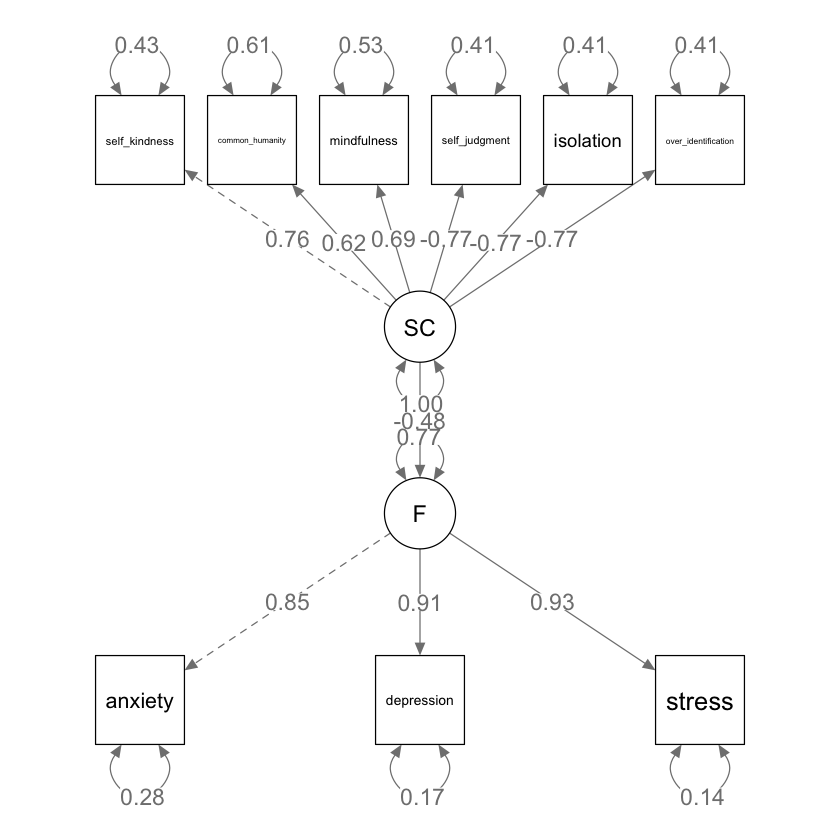

In [14]:
semPaths(fit_sc,
    whatLabels = "std",
    sizeMan = 10,
    edge.label.cex = 1.15,
    style = "ram",
    nCharNodes = 0, nCharEdges = 0
)

I coefficienti stimati nel modello SEM appaiono coerenti e in linea con le aspettative, in particolare il coefficiente che descrive l'effetto "causale" del fattore dell'autocompassione sul malessere psicologico, che si attesta a -0.48. Questo valore negativo corrobora l'ipotesi secondo cui l'autocompassione svolge un ruolo di fattore protettivo contro il malessere psicologico. Tuttavia, prima di confermare definitivamente questa conclusione, è cruciale esaminare gli indici di bontà di adattamento del modello. Questi indici ci permetteranno di valutare quanto accuratamente il modello SEM si adatta ai dati osservati, fornendo un quadro più chiaro della validità delle nostre inferenze. In altre parole, sebbene il modello suggerisca una relazione negativa tra autocompassione e malessere psicologico, la conferma finale di questa associazione dipenderà dall'adeguatezza complessiva del modello rispetto ai dati.

In [15]:
fitMeasures(fit_sc) |>
    print()

                 npar                  fmin                 chisq 
               19.000                 0.427               449.141 
                   df                pvalue        baseline.chisq 
               26.000                 0.000              3129.133 
          baseline.df       baseline.pvalue                   cfi 
               36.000                 0.000                 0.863 
                  tli                  nnfi                   rfi 
                0.811                 0.811                 0.801 
                  nfi                  pnfi                   ifi 
                0.856                 0.619                 0.864 
                  rni                  logl     unrestricted.logl 
                0.863            -12308.490            -12083.920 
                  aic                   bic                ntotal 
            24654.980             24736.021               526.000 
                 bic2                 rmsea        rmsea.ci.lo

L'analisi degli indici di bontà di adattamento rivela alcune preoccupazioni significative riguardo alla validità del nostro modello SEM. Il rapporto $\chi^2 / df$ emerge come eccessivamente elevato, segnalando una possibile mancanza di adattamento:

In [67]:
449.141 / 26

[1] 17.27465

Analogamente, i valori di CFI e TLI sono inferiori al livello desiderato, suggerendo che il modello non rappresenta adeguatamente la struttura dei dati. In aggiunta, gli indici RMSEA e SRMR superano le soglie accettabili, indicando ulteriormente un'inadeguata aderenza del modello ai dati.

Di fronte a questi risultati, è imprudente accettare la conclusione precedentemente formulata secondo cui l'autocompassione agisce come un fattore protettivo contro il malessere psicologico. Questa interpretazione, benché teoricamente fondata, non trova un solido supporto empirico nel contesto del modello attuale.

In questa situazione, un percorso costruttivo potrebbe essere quello di rivedere e potenzialmente modificare il modello. L'obiettivo sarebbe quello di esplorare alternative che potrebbero risultare in un migliore adattamento ai dati, mantenendo al contempo l'adeguatezza teorica. Ciò potrebbe includere la revisione delle assunzioni del modello, la riconsiderazione delle variabili incluse o la ristrutturazione delle relazioni ipotizzate tra di esse. Solo attraverso un modello che dimostra una bontà di adattamento adeguata possiamo affermare con maggiore sicurezza che i dati empirici sostengono l'ipotesi dell'effetto protettivo dell'autocompassione sul malessere psicologico.

## Commenti e considerazioni finali

Nella letteratura SEM sono state sollevate forti argomentazioni contro l'applicazione di RMSEA, CFI e TLI e i loro valori di cutoff convenzionali [si veda, ad esempio, {cite:t}`barrett2007structural`]. Tuttavia, prima che i ricercatori propongano e accettino alternative migliori, questi indici di bontà dell'adattamento continueranno ad essere applicati nella maggior parte degli studi SEM. {cite:t}`xia2019rmsea` fanno notare come, in base alla consuetudine corrente, valori RMSEA più grandi e valori CFI e TLI più piccoli indicano un adattamento peggiore. Ciò spinge i ricercatori a modificare i loro modelli per cercare di ottenere indici migliori. Tuttavia, la pratica attuale si è evoluta a tal punto da raggiungere la fase per cui gli indici di adattamento servono come *gli unici* criteri (in molte situazioni) per determinare se accettare o rifiutare un modello ipotizzato: se i valori degli indici di adattamento raggiungono la soglia "di pubblicabilità" (ad es. RMSEA < .06), allora non si ritiene più necessario migliorare il modello. In realtà, un'affermazione come la seguente non è sufficiente: "poiché i valori RMSEA, CFI e TLI suggeriscono un buon adattamento, questo modello è stato scelto come modello finale". Il raggiungimento di una serie di soglie desiderate di RMSEA, CFI e TLI è solo uno dei possibili indicatori che devono essere considerati nel processo di selezione di modelli. I ricercatori dovrebbero anche spiegare se esistono altre opzioni per migliorare il modello, perché tali opzioni sono o non sono adottate, e quali sono le conseguenze scientifiche e cliniche che derivano dalla scelta del modello in questione come quello finale.